In [6]:
import numpy as np
import pandas as pd
import random
import math 
import scipy.stats as st
import warnings
import pickle
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [3]:
warnings.simplefilter(action='ignore', category=Warning)
df = pd.read_csv('processed_teds2017.csv')
df.drop(columns=['REASON', 'Unnamed: 0'],inplace=True)

Index(['US_TERR', 'NE', 'MW', 'SOUTH', 'WEST', 'INDIV', 'ALC_DRUG_CAREPROV',
       'OTHER_CAREPROV', 'SCHOOL', 'EMPLOYER',
       ...
       'DAYWAIT', 'SELFHELP_P', 'SELFHELP_D', 'METHUSE', 'ETHNIC', 'PREG',
       'GENDER', 'VET', 'NOPRIOR', 'PSYPROB'],
      dtype='object', length=107)


In [59]:
file = open('loggrid.save', 'rb')
log_grid, log_X_test, log_y_test = pickle.load(file)
file.close()

runs = 10
feats = log_X_test.columns
log_scores = np.zeros([len(feats), runs])

log_X_test = pd.DataFrame(log_X_test, columns=feats)

log_test_score = log_grid.score(log_X_test,log_y_test)
print('logistic test score = ', log_test_score)
print('logistic test baseline = ',np.sum(log_y_test == 0)/len(log_y_test))

for i in range(len(feats)):
    print('shuffling '+str(feats[i]))
    log_acc_scores = []
    for j in range(runs):
        log_X_test_shuffled = log_X_test.copy()
        log_X_test_shuffled[feats[i]] = np.random.permutation(log_X_test[feats[i]].values)
        log_acc_scores.append(log_grid.score(log_X_test_shuffled,log_y_test))
    print('   shuffled test score:',np.around(np.mean(log_acc_scores),4),'+/-',np.around(np.std(log_acc_scores),4))
    log_scores[i] = log_acc_scores

logistic test score =  0.8369660528623325
logistic test baseline =  0.812351246398597
shuffling EDUC
   shuffled test score: 0.837 +/- 0.0002
shuffling LOS
   shuffled test score: 0.8224 +/- 0.0019
shuffling PSOURCE
   shuffled test score: 0.8356 +/- 0.0006
shuffling NOPRIOR
   shuffled test score: 0.837 +/- 0.0003
shuffling ARRESTS
   shuffled test score: 0.8369 +/- 0.0003
shuffling EMPLOY
   shuffled test score: 0.8359 +/- 0.0005
shuffling METHUSE
   shuffled test score: 0.8349 +/- 0.0005
shuffling PSYPROB
   shuffled test score: 0.8369 +/- 0.0004
shuffling PREG
   shuffled test score: 0.8369 +/- 0.0001
shuffling GENDER
   shuffled test score: 0.8374 +/- 0.0002
shuffling VET
   shuffled test score: 0.837 +/- 0.0002
shuffling LIVARAG
   shuffled test score: 0.8356 +/- 0.0005
shuffling DAYWAIT
   shuffled test score: 0.8367 +/- 0.0003
shuffling LIVARAG_D
   shuffled test score: 0.8332 +/- 0.0007
shuffling ARRESTS_D
   shuffled test score: 0.8356 +/- 0.0004
shuffling AGE
   shuffled tes

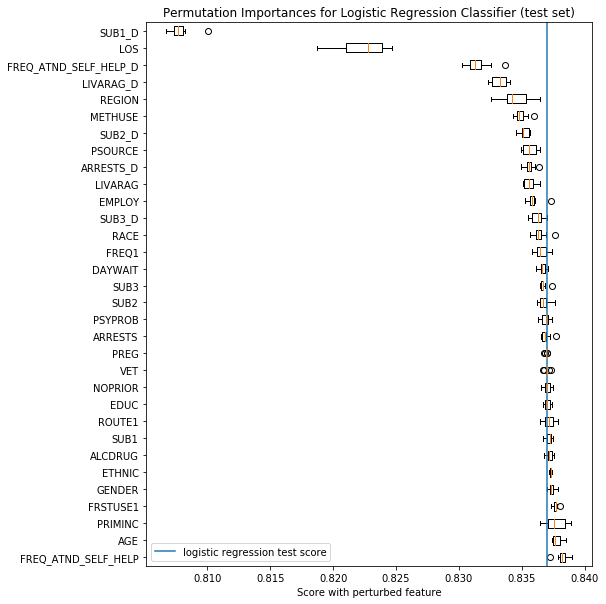

In [61]:
sorted_idx = np.argsort(np.mean(log_scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8,10))
plt.boxplot(log_scores[sorted_idx].T,labels=feats[sorted_idx],vert=False)
plt.axvline(log_test_score,label='logistic regression test score')
plt.title("Permutation Importances for Logistic Regression Classifier (test set)")
plt.xlabel('Score with perturbed feature')
plt.legend()
plt.savefig('logscores.png',dpi=300)
#plt.tight_layout()
plt.show()

In [72]:
file = open('rfgrid.save', 'rb')
rf_grid, rf_X_test, rf_y_test = pickle.load(file)
file.close()

runs = 10
feats = rf_X_test.columns
rf_scores = np.zeros([len(feats), runs])

rf_X_test = pd.DataFrame(rf_X_test, columns=feats)

rf_test_score = rf_grid.score(rf_X_test,rf_y_test)
print('random forest test score = ', rf_test_score)
print('random forest test baseline = ',np.sum(rf_y_test == 0)/len(rf_y_test))

for i in range(len(feats)):
    print('shuffling '+str(feats[i]))
    rf_acc_scores = []
    for j in range(runs):
        rf_X_test_shuffled = rf_X_test.copy()
        rf_X_test_shuffled[feats[i]] = np.random.permutation(rf_X_test[feats[i]].values)
        rf_acc_scores.append(rf_grid.score(rf_X_test_shuffled,rf_y_test))
    print('   shuffled test score:',np.around(np.mean(rf_acc_scores),4),'+/-',np.around(np.std(rf_acc_scores),4))
    rf_scores[i] = rf_acc_scores

random forest test score =  0.8322059376174371
random forest test baseline =  0.812351246398597
shuffling EDUC
   shuffled test score: 0.832 +/- 0.0002
shuffling LOS
   shuffled test score: 0.8269 +/- 0.0004
shuffling PSOURCE
   shuffled test score: 0.8304 +/- 0.0004
shuffling NOPRIOR
   shuffled test score: 0.8319 +/- 0.0001
shuffling ARRESTS
   shuffled test score: 0.8322 +/- 0.0001
shuffling EMPLOY
   shuffled test score: 0.8322 +/- 0.0001
shuffling METHUSE
   shuffled test score: 0.8321 +/- 0.0003
shuffling PSYPROB
   shuffled test score: 0.832 +/- 0.0001
shuffling PREG
   shuffled test score: 0.8323 +/- 0.0
shuffling GENDER
   shuffled test score: 0.832 +/- 0.0002
shuffling VET
   shuffled test score: 0.8321 +/- 0.0
shuffling LIVARAG
   shuffled test score: 0.8317 +/- 0.0002
shuffling DAYWAIT
   shuffled test score: 0.8319 +/- 0.0002
shuffling LIVARAG_D
   shuffled test score: 0.8302 +/- 0.0002
shuffling ARRESTS_D
   shuffled test score: 0.8311 +/- 0.0002
shuffling AGE
   shuffled

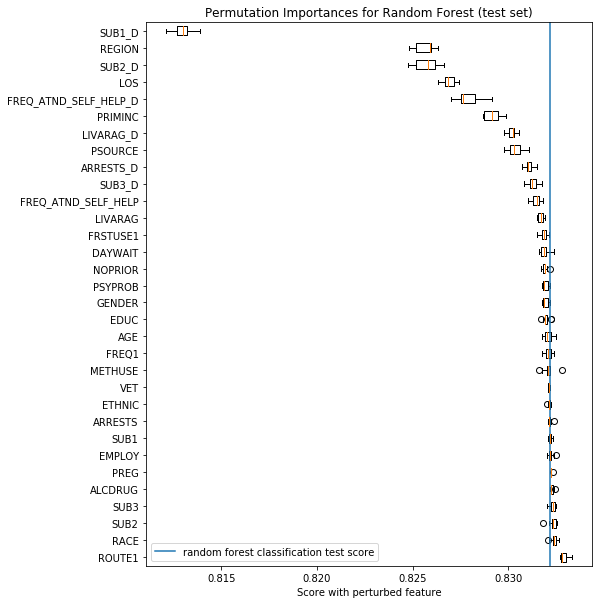

In [74]:
sorted_idx = np.argsort(np.mean(rf_scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(8,10))
plt.boxplot(rf_scores[sorted_idx].T,labels=feats[sorted_idx],vert=False)
plt.axvline(rf_test_score,label='random forest classification test score')
plt.title("Permutation Importances for Random Forest (test set)")
plt.xlabel('Score with perturbed feature')
plt.legend()
plt.savefig('rfscores.png',dpi=300)
#plt.tight_layout()
plt.show()

In [9]:
race = ['ALASKA_NAT', 'AM_INDIAN', 'API', 'BLACK', 'WHITE', 'ASIAN', 'ONE_R', 'TWO_R', 'HAWAIIAN']
livarr = ['HOMELESS', 'DEP_LIV', 'INDEP_LIV']
livarr_d = ['LIVARR_D_MISSING', 'HOMELESS_D', 'DEP_LIV_D', 'INDEP_LIV_D']
sources = ['INDIV', 'ALC_DRUG_CAREPROV', 'OTHER_CAREPROV', 'SCHOOL', 'EMPLOYER', 'COMM_REF', 'CRIM_JUST']
subs1 = ['ALC1', 'COC1', 'MARIJ1', 'HEROIN_OPS1', 'METH1', 'BENZ1', 'OTHER1']
subs2 = ['SUBS2_MISSING', 'NONE2', 'ALC2', 'COC2', 'MARIJ2', 'HEROIN_OPS2', 'METH2', 'BENZ2', 'OTHER2']
subs3 = ['SUBS3_MISSING', 'NONE3', 'ALC3', 'COC3', 'MARIJ3', 'HEROIN_OPS3', 'METH3', 'BENZ3', 'OTHER3']
subs1_d = ['SUBS1_D_MISSING', 'NONE1_D', 'ALC1_D', 'COC1_D', 'MARIJ1_D', 'HEROIN_OPS1_D', 'METH1_D', 'BENZ1_D', 'OTHER1_D']
subs2_d = ['SUBS2_D_MISSING', 'NONE2_D', 'ALC2_D', 'COC2_D', 'MARIJ2_D', 'HEROIN_OPS2_D', 'METH2_D', 'BENZ2_D', 'OTHER2_D']
subs3_d = ['SUBS3_D_MISSING', 'NONE3_D', 'ALC3_D', 'COC3_D', 'MARIJ3_D', 'HEROIN_OPS3_D', 'METH3_D', 'BENZ3_D', 'OTHER3_D']
regions = ['US_TERR', 'NE', 'MW', 'SOUTH', 'WEST']
ad_ind = ['ALC_ONLY', 'DRUGS_ONLY', 'ALC_DRUGS']
jobs = ['FT', 'PT', 'UNEMP', 'NLF']
routes1 = ['ORAL1', 'SMOK1', 'INHAL1', 'INJ1', 'OTHER_ROUTE1']
inc = ['INC_MISSING', 'WAGE', 'PUB_ASSIST', 'RET_DIS', 'OTHER', 'NONE']

cont_cols = ['EDUC', 'LOS', 'ARRESTS', 'ARRESTS_D', 'FREQ1', 'FRSTUSE1', 'AGE', 'ETHNIC', 'GENDER', 
                 'NOPRIOR', 'PREG', 'DAYWAIT', 'FREQ_ATND_SELF_HELP', 'FREQ_ATND_SELF_HELP_D', 
                 'METHUSE', 'VET', 'PSYPROB']

feat_names = regions + sources + livarr + livarr_d + \
race + subs1 + subs2 + subs3 + subs1_d + subs2_d + subs3_d + \
ad_ind + jobs + routes1 + inc + cont_cols


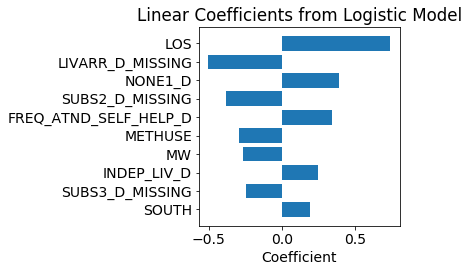

In [14]:
coefs = log_grid.best_estimator_.named_steps['logisticregression'].coef_[0]
indx = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[indx[-10:]])
plt.yticks(np.arange(10),np.array(feat_names)[indx[-10:]])
plt.xlabel('Coefficient')
plt.title('Linear Coefficients from Logistic Model')
plt.tight_layout()
plt.savefig('LR_coefs.png',dpi=300)
plt.show()

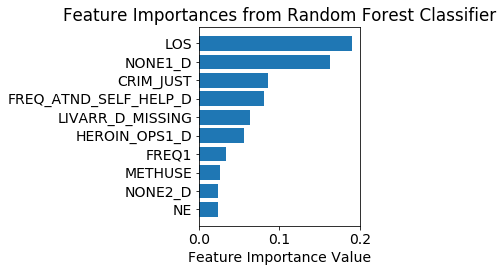

In [13]:
imps = rf_grid.best_estimator_.named_steps['randomforestclassifier'].feature_importances_
indx = np.argsort(np.abs(imps))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),imps[indx[-10:]])
plt.yticks(np.arange(10),np.array(feat_names)[indx[-10:]])
plt.xlabel('Feature Importance Value')
plt.title('Feature Importances from Random Forest Classifier')
plt.tight_layout()
plt.savefig('rffeats.png',dpi=300)
plt.show()

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


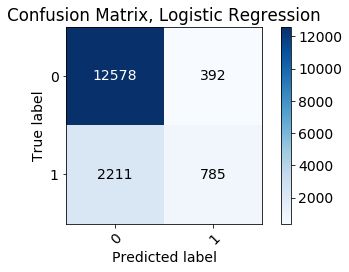

In [68]:
plot_confusion_matrix(log_y_test,log_grid.predict(log_X_test),classes=[0,1])
plt.title("Confusion Matrix, Logistic Regression")
plt.savefig('logmat.png',dpi=300)
plt.show()

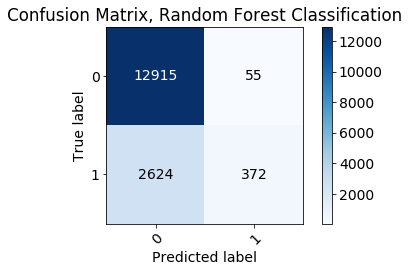

In [82]:
plot_confusion_matrix(rf_y_test,rf_grid.predict(rf_X_test),classes=[0,1])
plt.title("Confusion Matrix, Random Forest Classification")
plt.savefig('rfmat.png',dpi=300)
plt.show()

In [7]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(rf_grid.best_estimator_[2])
# transform the test set
X_test_transformed = rf_grid.best_estimator_[0].transform(rf_X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:1000])
print(np.shape(shap_values))

(15966, 115)
(2, 1000, 115)


In [10]:
index = 10 # the index of the point to explain
print(explainer.expected_value[1]) # we explain class 1 predictions
shap.force_plot(explainer.expected_value[1], shap_values[1], features = X_test_transformed,feature_names = feat_names)

0.18762526619065512


True


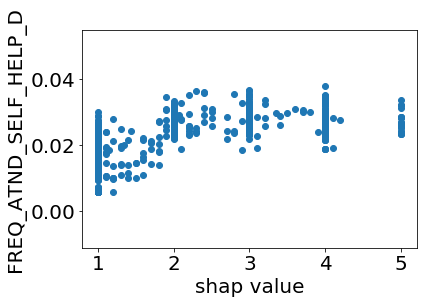

In [41]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
ftr = 'FREQ_ATND_SELF_HELP_D'
print(feat_names[111] == ftr)
indx = np.argwhere(feat_names==ftr)
plt.scatter(X_test_transformed[:1000,111],shap_values[1][:,111])
plt.xlabel('shap value')
plt.ylabel(ftr)
plt.show()


In [12]:
import pickle
file = open('rfgrid.save', 'rb')
rf_grid, rf_X_test, rf_y_test = pickle.load(file)
file.close()

file = open('loggrid.save', 'rb')
log_grid, log_X_test, log_y_test = pickle.load(file)
file.close()